In [ ]:
#1.Train a KNN Classifier on the Iris dataset and print model accuracy.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 1.00


In [ ]:
#2.Train a KNN Regressor on a synthetic dataset and evaluate using Mean Squared Error (MSE).
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=200, n_features=1, noise=10, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)

y_pred = knn_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 275.95


In [ ]:
#3.Train a KNN Classifier using different distance metrics (Euclidean and Manhattan) and compare accuracy.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_euclidean = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_euclidean.fit(X_train, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test)
acc_euclidean = accuracy_score(y_test, y_pred_euclidean)

knn_manhattan = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
knn_manhattan.fit(X_train, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test)
acc_manhattan = accuracy_score(y_test, y_pred_manhattan)

print(f"Accuracy with Euclidean distance: {acc_euclidean:.2f}")
print(f"Accuracy with Manhattan distance: {acc_manhattan:.2f}")


Accuracy with Euclidean distance: 1.00
Accuracy with Manhattan distance: 1.00


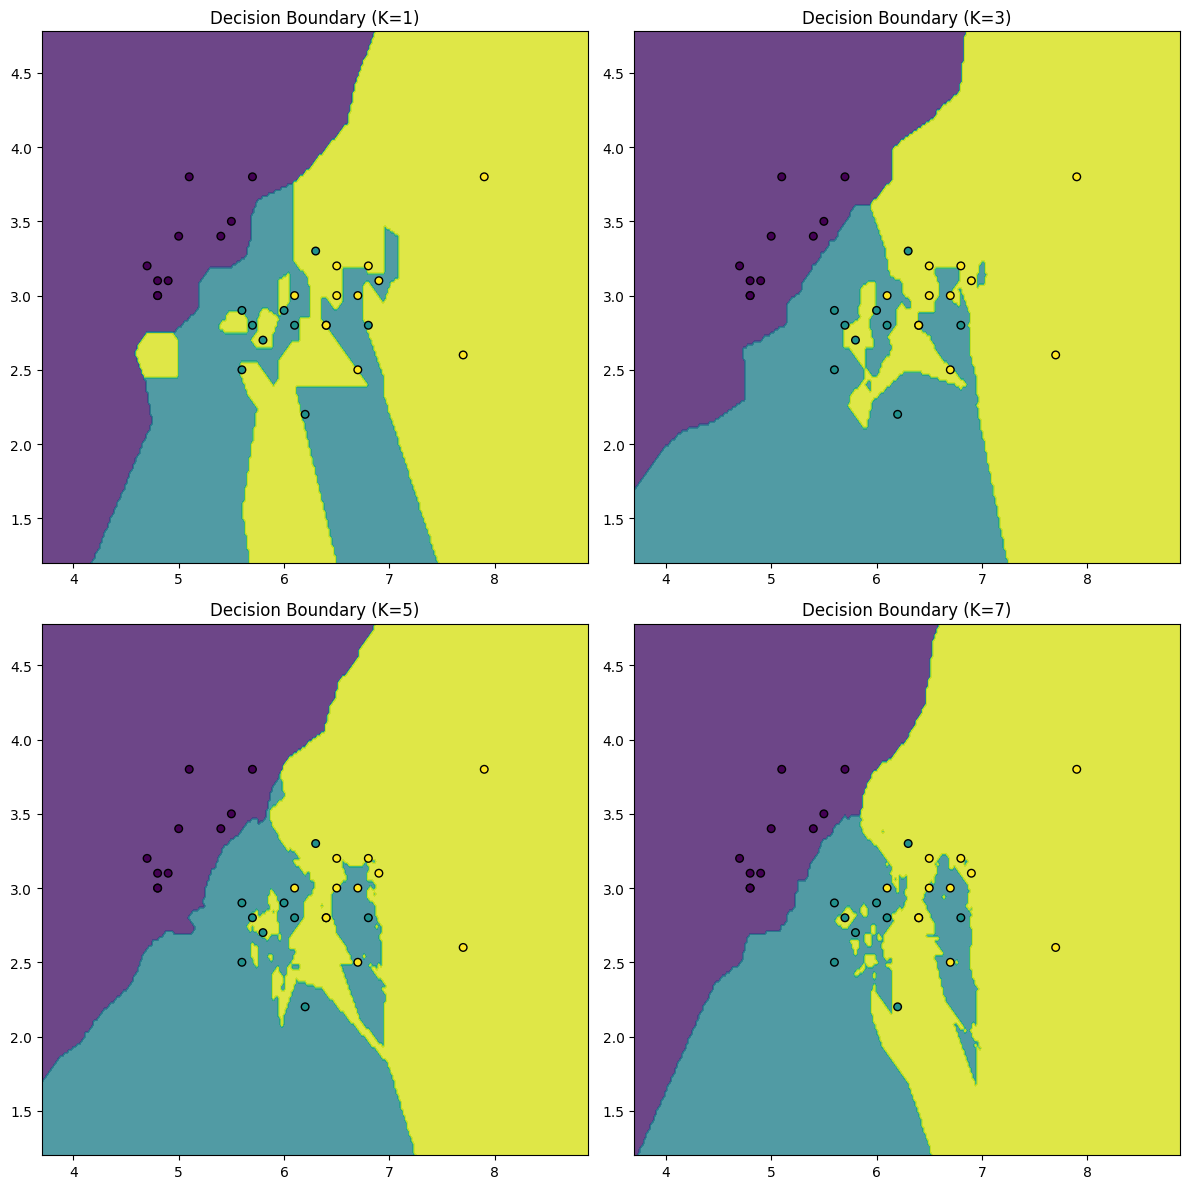

In [ ]:
#4.Train a KNN Classifier with different values of K and visualize decision boundaried.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X, y = iris.data[:, :2], iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def plot_decision_boundary(X, y, model, ax, title):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=30)
    ax.set_title(title)

k_values = [1, 3, 5, 7]
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

for i, k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    ax = axes[i // 2, i % 2]
    plot_decision_boundary(X_test, y_test, knn, ax, f"Decision Boundary (K={k})")

plt.tight_layout()
plt.show()


In [ ]:
#5.Apply Feature Scaling before training a KNN model and compare results with unscaled data.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_no_scaling = KNeighborsClassifier(n_neighbors=3)
knn_no_scaling.fit(X_train, y_train)
y_pred_no_scaling = knn_no_scaling.predict(X_test)
acc_no_scaling = accuracy_score(y_test, y_pred_no_scaling)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_with_scaling = KNeighborsClassifier(n_neighbors=3)
knn_with_scaling.fit(X_train_scaled, y_train)
y_pred_with_scaling = knn_with_scaling.predict(X_test_scaled)
acc_with_scaling = accuracy_score(y_test, y_pred_with_scaling)

print(f"Accuracy without feature scaling: {acc_no_scaling:.2f}")
print(f"Accuracy with feature scaling: {acc_with_scaling:.2f}")


Accuracy without feature scaling: 1.00
Accuracy with feature scaling: 1.00


In [ ]:
#6.Train a PCA model on synthetic data and print the explained variance ratio for each component.
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
import numpy as np

X, y = make_classification(n_samples=200, n_features=5, n_informative=3, random_state=42)

pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)

print("Explained variance ratio for each component:")
print(pca.explained_variance_ratio_)


Explained variance ratio for each component:
[5.16632155e-01 3.51071728e-01 1.32296117e-01 2.75783825e-16
 4.02277380e-17]


In [ ]:
#7.Apply PCA before training a KNN Classifier and compare accuracy with and without PCA.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_no_pca = KNeighborsClassifier(n_neighbors=3)
knn_no_pca.fit(X_train_scaled, y_train)
y_pred_no_pca = knn_no_pca.predict(X_test_scaled)
acc_no_pca = accuracy_score(y_test, y_pred_no_pca)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

knn_with_pca = KNeighborsClassifier(n_neighbors=3)
knn_with_pca.fit(X_train_pca, y_train)
y_pred_with_pca = knn_with_pca.predict(X_test_pca)
acc_with_pca = accuracy_score(y_test, y_pred_with_pca)

print(f"Accuracy without PCA: {acc_no_pca:.2f}")
print(f"Accuracy with PCA: {acc_with_pca:.2f}")


Accuracy without PCA: 1.00
Accuracy with PCA: 0.93


In [ ]:
#8. Perform Hyperparameter Tuning on a KNN Classifier using GridSearchCV.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'metric': ['euclidean', 'manhattan', 'chebyshev'],
    'weights': ['uniform', 'distance']
}

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-validation Accuracy: {best_score:.2f}")
print(f"Test Accuracy with Best Model: {test_accuracy:.2f}")


Best Hyperparameters: {'metric': 'chebyshev', 'n_neighbors': 5, 'weights': 'distance'}
Best Cross-validation Accuracy: 0.97
Test Accuracy with Best Model: 1.00


In [ ]:
#9.Train a KNN Classifier and check the number of misclassified samples.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('/content/KNNAlgorithmDataset.csv')

encoder = LabelEncoder()

for column in df.columns:
    if df[column].dtype == 'object':

if 'Unnamed: 32' in df.columns and df['Unnamed: 32'].isnull().sum() > len(df) / 2:
    df = df.drop(columns=['Unnamed: 32'])


X = df.iloc[:, :-1]
y = df.iloc[:, -1]


if pd.api.types.is_numeric_dtype(y) and not pd.api.types.is_bool_dtype(y):

    threshold = y.median()
    y = (y > threshold).astype(int)
    print("Target variable converted to discrete.")
else:
    print("Target variable is already discrete.")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

misclassified_samples = (y_test != y_pred).sum()

print(f"Accuracy: {accuracy:.2f}")
print(f"Number of misclassified samples: {misclassified_samples}")

Target variable converted to discrete.
Accuracy: 0.50
Number of misclassified samples: 57


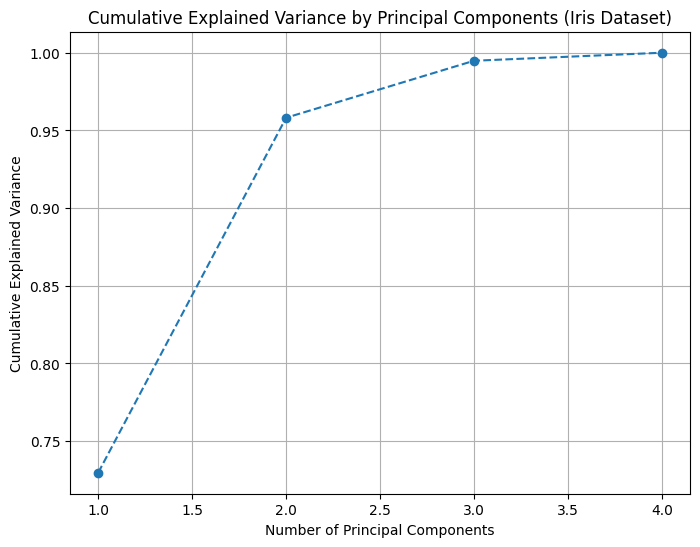

In [ ]:
#10.Train a PCA model and visualize the cumulative explained variance.
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components (Iris Dataset)')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


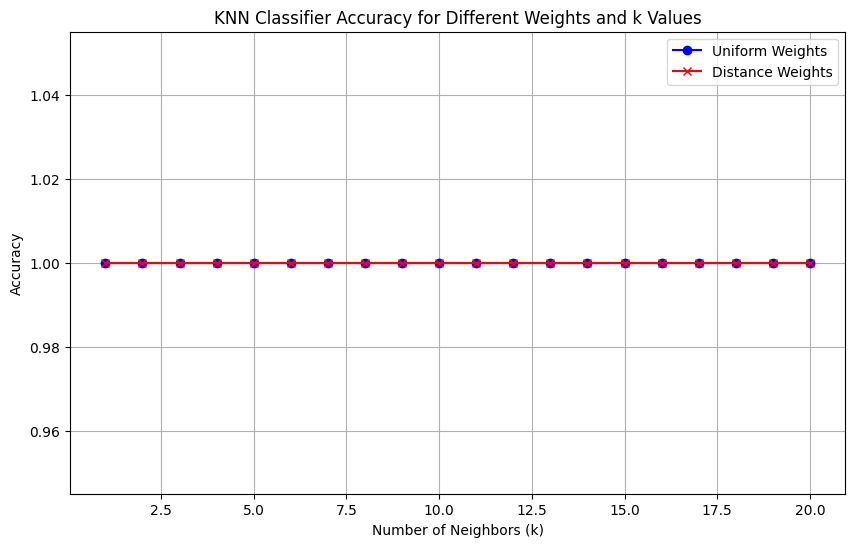

In [1]:
#11. Train a KNN Classifier using different values of the weights parameter (uniform vs. distance) and compare accuracy.
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

accuracies_uniform = []
accuracies_distance = []

k_values = range(1, 21)

for k in k_values:
    knn_uniform = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    knn_uniform.fit(X_train, y_train)
    y_pred_uniform = knn_uniform.predict(X_test)
    accuracies_uniform.append(accuracy_score(y_test, y_pred_uniform))

    knn_distance = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn_distance.fit(X_train, y_train)
    y_pred_distance = knn_distance.predict(X_test)
    accuracies_distance.append(accuracy_score(y_test, y_pred_distance))

plt.figure(figsize=(10,6))
plt.plot(k_values, accuracies_uniform, label='Uniform Weights', color='blue', marker='o')
plt.plot(k_values, accuracies_distance, label='Distance Weights', color='red', marker='x')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Classifier Accuracy for Different Weights and k Values')
plt.legend()
plt.grid(True)
plt.show()


In [4]:
#12. Train a KNN Regressor and analyze the effect of different K values on performance.
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

data = fetch_california_housing()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

mse_dict = {}

k_values = range(1, 21)

for k in k_values:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train, y_train)

    y_pred = knn_regressor.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mse_dict[k] = mse

print("Mean Squared Error for different k values:")
for k, mse in mse_dict.items():
    print(f"k = {k}: MSE = {mse:.4f}")

Mean Squared Error for different k values:
k = 1: MSE = 1.6255
k = 2: MSE = 1.2897
k = 3: MSE = 1.1982
k = 4: MSE = 1.1657
k = 5: MSE = 1.1369
k = 6: MSE = 1.1350
k = 7: MSE = 1.1266
k = 8: MSE = 1.1255
k = 9: MSE = 1.1285
k = 10: MSE = 1.1274
k = 11: MSE = 1.1294
k = 12: MSE = 1.1302
k = 13: MSE = 1.1354
k = 14: MSE = 1.1387
k = 15: MSE = 1.1437
k = 16: MSE = 1.1450
k = 17: MSE = 1.1502
k = 18: MSE = 1.1561
k = 19: MSE = 1.1590
k = 20: MSE = 1.1652


In [5]:
#13. Implement KNN Imputation for handling missing values in a dataset.
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer

data = {
    'feature1': [1.0, 2.0, np.nan, 4.0, 5.0],
    'feature2': [3.0, np.nan, 6.0, 7.0, 8.0],
    'feature3': [9.0, 10.0, 11.0, np.nan, 13.0]
}

df = pd.DataFrame(data)

print("Original Dataset with Missing Values:")
print(df)

knn_imputer = KNNImputer(n_neighbors=2)

df_imputed = knn_imputer.fit_transform(df)

df_imputed = pd.DataFrame(df_imputed, columns=df.columns)

print("\nDataset After KNN Imputation:")
print(df_imputed)


Original Dataset with Missing Values:
   feature1  feature2  feature3
0       1.0       3.0       9.0
1       2.0       NaN      10.0
2       NaN       6.0      11.0
3       4.0       7.0       NaN
4       5.0       8.0      13.0

Dataset After KNN Imputation:
   feature1  feature2  feature3
0       1.0       3.0       9.0
1       2.0       4.5      10.0
2       3.0       6.0      11.0
3       4.0       7.0      12.0
4       5.0       8.0      13.0


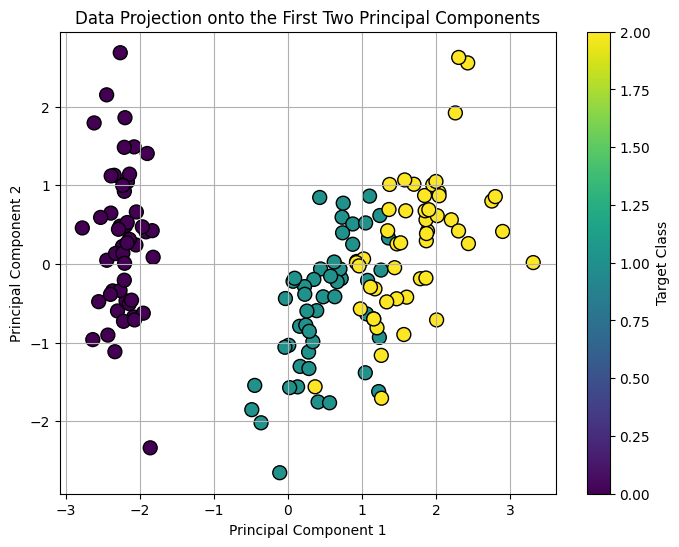

In [6]:
#14.Train a PCA model and visualize the data projection onto the first two principal components.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
plt.colorbar(label='Target Class')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data Projection onto the First Two Principal Components')
plt.grid(True)
plt.show()


In [7]:
#15.Train a KNN Classifier using the KD Tree and Ball Tree algorithms and compare performance.
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

accuracies_kd_tree = []
accuracies_ball_tree = []

for k in range(1, 21):
    knn_kd_tree = KNeighborsClassifier(n_neighbors=k, algorithm='kd_tree')
    knn_kd_tree.fit(X_train, y_train)
    y_pred_kd_tree = knn_kd_tree.predict(X_test)
    accuracy_kd_tree = accuracy_score(y_test, y_pred_kd_tree)
    accuracies_kd_tree.append(accuracy_kd_tree)

    knn_ball_tree = KNeighborsClassifier(n_neighbors=k, algorithm='ball_tree')
    knn_ball_tree.fit(X_train, y_train)
    y_pred_ball_tree = knn_ball_tree.predict(X_test)
    accuracy_ball_tree = accuracy_score(y_test, y_pred_ball_tree)
    accuracies_ball_tree.append(accuracy_ball_tree)

print("KNN Classifier Performance for Different k Values:")
for k in range(1, 21):
    print(f"k = {k}: KD Tree Accuracy = {accuracies_kd_tree[k-1]:.4f}, Ball Tree Accuracy = {accuracies_ball_tree[k-1]:.4f}")


KNN Classifier Performance for Different k Values:
k = 1: KD Tree Accuracy = 1.0000, Ball Tree Accuracy = 1.0000
k = 2: KD Tree Accuracy = 1.0000, Ball Tree Accuracy = 1.0000
k = 3: KD Tree Accuracy = 1.0000, Ball Tree Accuracy = 1.0000
k = 4: KD Tree Accuracy = 1.0000, Ball Tree Accuracy = 1.0000
k = 5: KD Tree Accuracy = 1.0000, Ball Tree Accuracy = 1.0000
k = 6: KD Tree Accuracy = 1.0000, Ball Tree Accuracy = 1.0000
k = 7: KD Tree Accuracy = 1.0000, Ball Tree Accuracy = 1.0000
k = 8: KD Tree Accuracy = 1.0000, Ball Tree Accuracy = 1.0000
k = 9: KD Tree Accuracy = 1.0000, Ball Tree Accuracy = 1.0000
k = 10: KD Tree Accuracy = 1.0000, Ball Tree Accuracy = 1.0000
k = 11: KD Tree Accuracy = 1.0000, Ball Tree Accuracy = 1.0000
k = 12: KD Tree Accuracy = 1.0000, Ball Tree Accuracy = 1.0000
k = 13: KD Tree Accuracy = 1.0000, Ball Tree Accuracy = 1.0000
k = 14: KD Tree Accuracy = 1.0000, Ball Tree Accuracy = 1.0000
k = 15: KD Tree Accuracy = 1.0000, Ball Tree Accuracy = 1.0000
k = 16: KD Tr

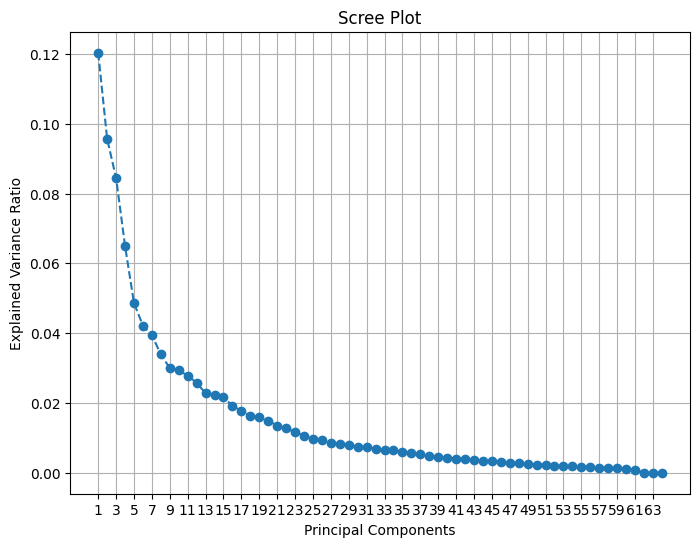

In [8]:
#16.Train a PCA model on a high-dimensional dataset and visualize the Scree plot.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

data = load_digits()
X = data.data
y = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
pca.fit(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(np.arange(1, len(explained_variance_ratio) + 1, 2))
plt.grid(True)
plt.show()


In [11]:
#17.Train a KNN Classifier and evaluate performance using Precision, Recall, and F1-Score.
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)




Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


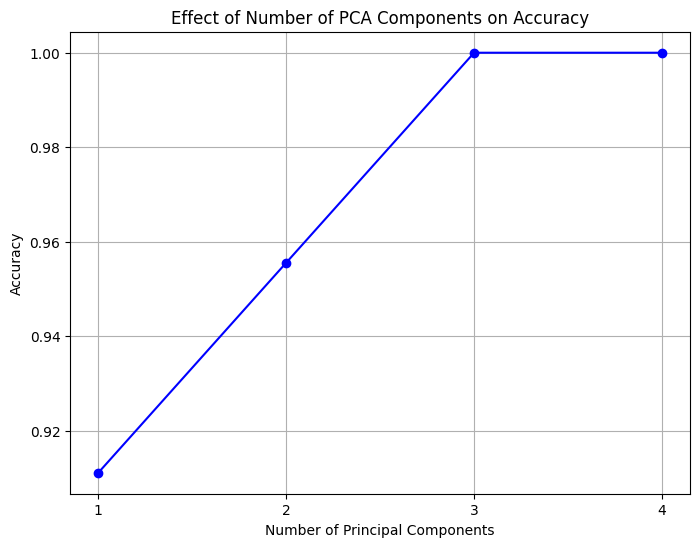

In [12]:
#18.Train a PCA model and analyze the effect of different numbers of components on accuracy.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

data = load_iris()
X = data.data
y = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

accuracies = []

for n_components in range(1, X.shape[1] + 1):
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train_pca, y_train)

    y_pred = knn.predict(X_test_pca)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

plt.figure(figsize=(8, 6))
plt.plot(range(1, X.shape[1] + 1), accuracies, marker='o', linestyle='-', color='b')
plt.title('Effect of Number of PCA Components on Accuracy')
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.xticks(range(1, X.shape[1] + 1))
plt.grid(True)
plt.show()


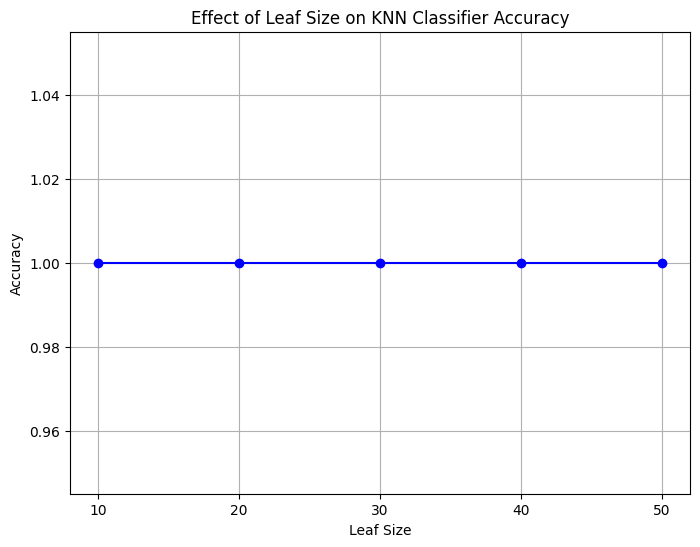

In [13]:
#19.Train a KNN Classifier with different leaf_size values and compare accuracy.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

data = load_iris()
X = data.data
y = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

accuracies = []

leaf_sizes = range(10, 51, 10)

for leaf_size in leaf_sizes:
    knn = KNeighborsClassifier(n_neighbors=3, leaf_size=leaf_size)

    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

plt.figure(figsize=(8, 6))
plt.plot(leaf_sizes, accuracies, marker='o', linestyle='-', color='b')
plt.title('Effect of Leaf Size on KNN Classifier Accuracy')
plt.xlabel('Leaf Size')
plt.ylabel('Accuracy')
plt.xticks(leaf_sizes)
plt.grid(True)
plt.show()


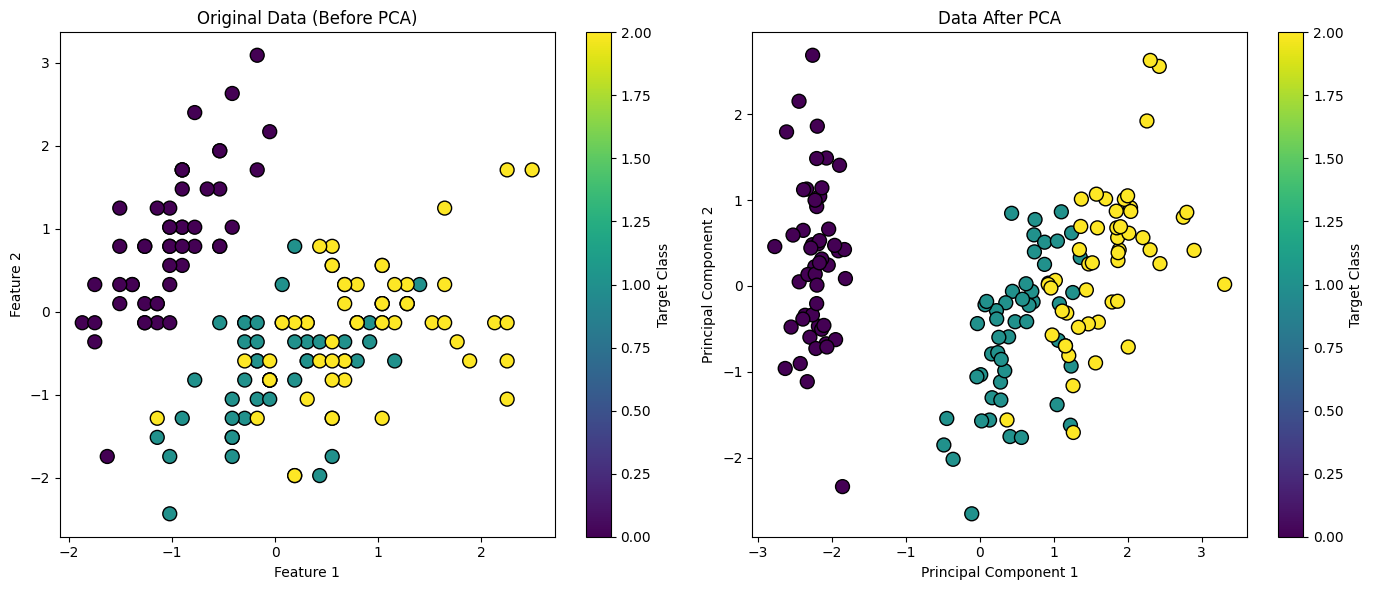

In [14]:
#20.Train a PCA model and visualize how data points are transformed before and after PCA.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

data = load_iris()
X = data.data
y = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
plt.title('Original Data (Before PCA)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Target Class')

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
plt.title('Data After PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Target Class')

plt.tight_layout()
plt.show()


In [18]:
#21.Train a KNN Classifier on a real-world dataset (Wine dataset) and print classification report.
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

data = load_wine()
X = data.data
y = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.90      0.95        21
           2       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



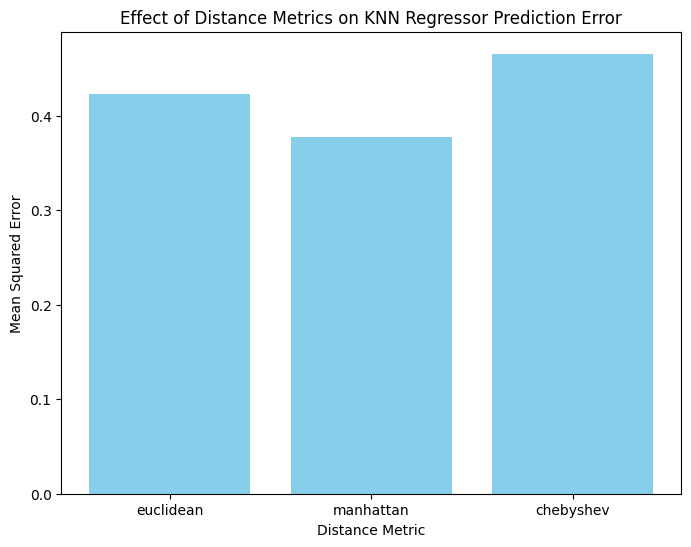

In [19]:
#22. Train a KNN Regressor and analyze the effect of different distance metrics on prediction error.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

data = fetch_california_housing()
X = data.data
y = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

distance_metrics = ['euclidean', 'manhattan', 'chebyshev']
errors = []

for metric in distance_metrics:
    knn = KNeighborsRegressor(n_neighbors=5, metric=metric)

    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    errors.append(mse)

plt.figure(figsize=(8, 6))
plt.bar(distance_metrics, errors, color='skyblue')
plt.title('Effect of Distance Metrics on KNN Regressor Prediction Error')
plt.xlabel('Distance Metric')
plt.ylabel('Mean Squared Error')
plt.show()


In [20]:
#23.Train a KNN Classifier and evaluate using ROC-AUC score.
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

data = load_iris()
X = data.data
y = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

roc_auc = roc_auc_score(y_test_bin, knn.predict_proba(X_test), average='macro', multi_class='ovr')

print(f"ROC-AUC Score: {roc_auc}")


ROC-AUC Score: 1.0


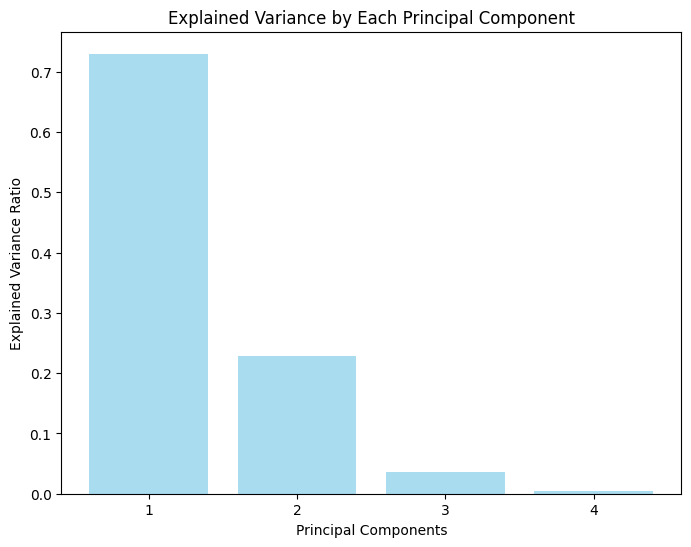

In [21]:
#24.Train a PCA model and visualize the variance captured by each principal component.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

data = load_iris()
X = data.data
y = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
pca.fit(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, color='skyblue')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Each Principal Component')
plt.xticks(np.arange(1, len(explained_variance_ratio) + 1))
plt.show()


In [22]:
#25. Train a KNN Classifier and perform feature selection before training.
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score

data = load_iris()
X = data.data
y = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

selector = SelectKBest(f_classif, k=2)
X_selected = selector.fit_transform(X_scaled, y)

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of KNN Classifier after feature selection: {accuracy:.4f}")


Accuracy of KNN Classifier after feature selection: 1.0000


Reconstruction Error (MSE): 0.0419


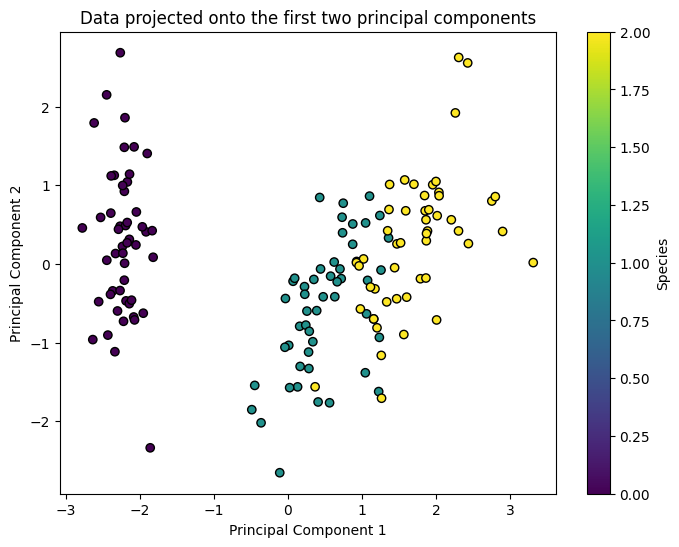

In [23]:
#26.Train a PCA model and visualize the data reconstruction error after reducing dimensions.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

data = load_iris()
X = data.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_reconstructed = pca.inverse_transform(X_pca)

reconstruction_error = mean_squared_error(X_scaled, X_reconstructed)

print(f"Reconstruction Error (MSE): {reconstruction_error:.4f}")

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data.target, cmap='viridis', edgecolor='k')
plt.colorbar(label='Species')
plt.title('Data projected onto the first two principal components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


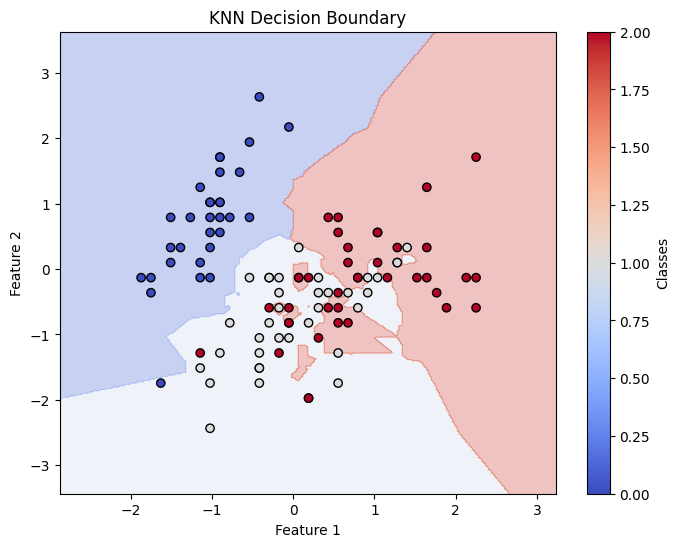

In [24]:
#27. Train a KNN Classifier and visualize the decision boundary.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

data = load_iris()
X = data.data[:, :2]
y = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

def plot_decision_boundary(X, y, model, ax):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap='coolwarm')
    ax.set_title("KNN Decision Boundary")
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    return scatter

fig, ax = plt.subplots(figsize=(8, 6))
scatter = plot_decision_boundary(X_train, y_train, knn, ax)
fig.colorbar(scatter, ax=ax, label='Classes')
plt.show()


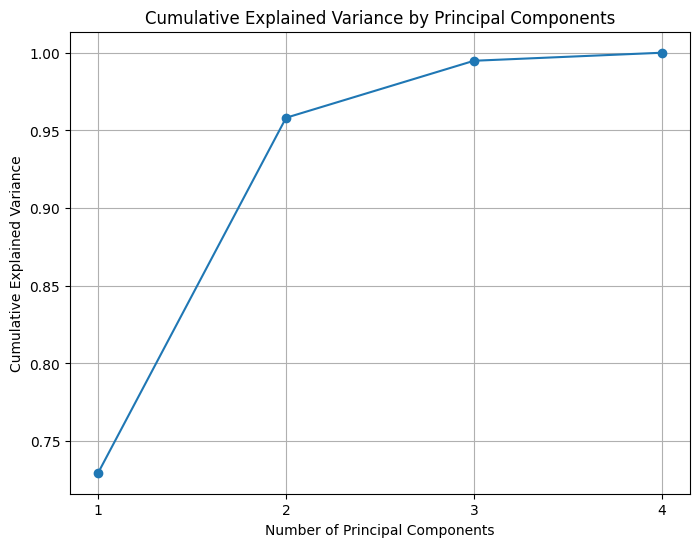

Principal Component 1: 0.7296 explained variance
Principal Component 2: 0.2285 explained variance
Principal Component 3: 0.0367 explained variance
Principal Component 4: 0.0052 explained variance


In [25]:
#28.Train a PCA model and analyze the effect of different numbers of components on data variance.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
data = load_iris()
X = data.data
y = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
pca.fit(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), marker='o')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(np.arange(1, len(explained_variance_ratio) + 1))
plt.grid(True)
plt.show()

for i, var in enumerate(explained_variance_ratio, 1):
    print(f"Principal Component {i}: {var:.4f} explained variance")
